<a href="https://colab.research.google.com/github/Vidhyapunuri/Chilli-leaf-disease-prediction-using-deep-learning/blob/main/minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHILLI LEAF DISEASE PREDICTION USING DEEP LEARNING**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vidhyullathapunuri","key":"8a5e6a0d3abbde5539374fa3e15fffbb"}'}

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ahmadalmahsiri/chili-plant-disease
!unzip chili-plant-disease

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chili-plant-disease.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chili-plant-disease.zip
replace Chili_Plant_Disease/test/healthy/Cabai sehat003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as np
import torch.optim as optim

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

In [ ]:
train_images = torchvision.datasets.ImageFolder('/content/Chili_Plant_Disease/train',transform=transform)
val_images = torchvision.datasets.ImageFolder('/content/Chili_Plant_Disease/val',transform=transform)
test_images = torchvision.datasets.ImageFolder('/content/Chili_Plant_Disease/test',transform=transform)

In [ ]:
trainloader = torch.utils.data.DataLoader(train_images,batch_size=4,shuffle=True,num_workers=2)
valloader = torch.utils.data.DataLoader(val_images,batch_size=4,num_workers=2)
testloader = torch.utils.data.DataLoader(test_images,batch_size=4,num_workers=2)

classes = train_images.classes


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

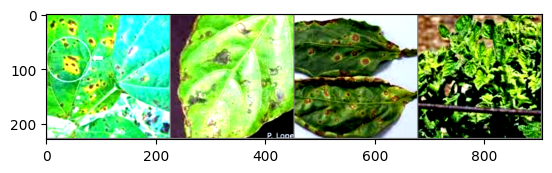

leaf spot leaf spot leaf spot leaf curl


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
AlexNet_model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
AlexNet_model.classifier[6] = nn.Linear(4096,len(classes))

AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
AlexNet_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Loss
criterion = nn.CrossEntropyLoss()
#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        output = AlexNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 40 == 0:    # print every 40 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i , running_loss / 40))
            running_loss = 0.0
print('Finished Training of AlexNet')

[1,     0] loss: 0.406
[1,    40] loss: 11.943
[1,    80] loss: 12.215
[2,     0] loss: 0.260
[2,    40] loss: 11.745
[2,    80] loss: 12.009
[3,     0] loss: 0.285
[3,    40] loss: 11.857
[3,    80] loss: 11.906
[4,     0] loss: 0.333
[4,    40] loss: 11.836
[4,    80] loss: 11.608
[5,     0] loss: 0.317
[5,    40] loss: 11.744
[5,    80] loss: 11.950
[6,     0] loss: 0.292
[6,    40] loss: 12.238
[6,    80] loss: 11.762
[7,     0] loss: 0.360
[7,    40] loss: 11.644
[7,    80] loss: 11.892
[8,     0] loss: 0.251
[8,    40] loss: 11.512
[8,    80] loss: 12.211
[9,     0] loss: 0.298
[9,    40] loss: 11.347
[9,    80] loss: 12.310
[10,     0] loss: 0.285
[10,    40] loss: 11.513
[10,    80] loss: 12.019
[11,     0] loss: 0.277
[11,    40] loss: 11.963
[11,    80] loss: 11.617
[12,     0] loss: 0.252
[12,    40] loss: 12.258
[12,    80] loss: 11.666
[13,     0] loss: 0.266
[13,    40] loss: 12.194
[13,    80] loss: 11.761
[14,     0] loss: 0.355
[14,    40] loss: 11.867
[14,    80] loss

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
#         print(labels.size(0))
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 16 %


In [ ]:
#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of healthy : 10 %
Accuracy of leaf curl : 40 %
Accuracy of leaf spot :  0 %
Accuracy of whitefly :  0 %
Accuracy of yellowish : 30 %


Predicted disease for the uploaded image: Unknown


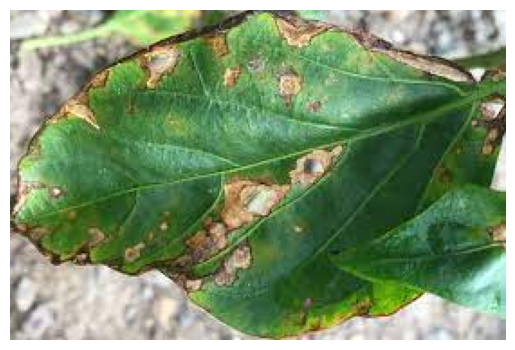

In [ ]:
import torch
from torchvision import models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained AlexNet model
AlexNet_model = models.alexnet(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
AlexNet_model.to(device)

# Define the transform for preprocessing the image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
classes = train_images.classes
# Define the classes based on the dataset
classes = train_images.classes  # Assuming train_images is properly defined

def predict_image(image_path, model, transform):
    # Open the image file
    image = Image.open("/content/Real_time_img-6.jpg")
    # Apply transformations
    image = transform(image).unsqueeze(0)
    # Move image to the appropriate device
    image = image.to(device)
    # Perform prediction
    with torch.no_grad():
         output = model(image)
         _, predicted = torch.max(output, 1)
        # Ensure predicted index is within the valid range of classes list
         if predicted.item() < len(classes):
            predicted_class = classes[predicted.item()]
         else:
            predicted_class = "Unknown"  # Handle out-of-range case
    return predicted_class
# Example usage:
image_path = "/content/Real_time_img-6.jpg"
predicted_disease = predict_image(image_path, AlexNet_model, transform)
print('Predicted disease for the uploaded image:', predicted_disease)

# Display the uploaded image
image = Image.open("/content/Real_time_img-6.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()
